# 教女友学习机器学习0X00——简单介绍与线性回归

## 前言
女友是商院经济学学生一枚，偏文科，最近要开始写论文了，买了一堆书回来，结果看了好几天，硬是没看懂，请教我的时候我才发现——我去！这里面的好多模型不就是机器学习吗？  
“什么叫机器学习？”女友很好奇地问我，“就是人工智能吗？”  
“呃……算是吧！”  
对于机器学习，我没有办法很直观地解释（其实是出于懒），我突然想到了我的机器学习启蒙课程——Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)，于是乎，用了一晚上时间，给她弄好了翻墙和MATLAB，期待她能在知识的海洋里尽情遨游……  
然而，一切都是我的幻想！！当她学习到梯度下降的时候，已经云里雾里！  
这！可！咋！办！  
左思又想，还是得我亲自上阵，好好解释一番，就当是我也给自己梳理一下这门课程。  
这一系列博客中用的代码都是python3写的，为啥不用MATLAB？答案很自私——因为我MATLAB的代码已经敲过一遍了，没挑战，多无聊！强烈安利大家直接下载安装[Anaconda](https://www.continuum.io/downloads/)，里面Python的科学计算库相当完善。

## 后记
在我看来，大学之前的知识与大学知识的最大的观念上的差异就是上大学之前给我们引入的是世间万物是确定的简化的关系——汽车时速70km/h，3小时就会行驶210km；在无摩擦的情况下，一个方块以5m/s的速度运行，另一个相同质量的方块以3m/s的速度相对运行，两个方块上装有弹簧发生弹性碰撞，二者交换速度，反向运行……  
我们会做许多假设，忽略各种因素，造就各种理想的模型，这样的好处是显而易见的，那就是可以透过各种杂七杂八的干扰观察世界，便于进行核心概念的理解和生活上简单的使用。然而，实际的情况并非如此简单，高中的时候，我相信很多人做过一个实验，一个纸带上挂一个重物，放在桌子边沿释放，打点计时器在上面打点，取下纸带后，我们发现纸带上的点的间隔越来越宽，用尺子量一量，貌似、好像接近我们的加速度公式的结果，但是，误差好像还有点大。  
没错，这才是我们在现实中测量遇到的现象，但是就算是实验会遇到，做题的时候也不会有这种题目，所以在高考的指挥棒下，我们没有对这个实验进行太多的思考……当然，高中的数学其实也引入了误差的概念，比如线性回归方程，就是在各种点中找到最符合预期的一条直线，使得总误差最小。可是，我们除了背下那段无聊的公式，貌似也没有太多思考这些分布在直线周围的点到底有多少含义。  
在大学中，我们会发现，下坠物体的模型越来越复杂了，会考虑风速、摩擦了，要思考测量误差了；房价不仅仅和面积有关了，也和楼层、布局、小区位置有关了，我们要建立的模型建立的模型越来越复杂了。

## 线性回归（Linear Regreesion）
我们先不提有监督无监督学习，也不管是拟合还是分类，也不说找最优值的方法，直接先来线性回归的例子（监督学习、拟合），就是用线来拟合数据，直观的学习比什么都重要。这里的数据使用的是Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)提供的数据。

首先先导入Python要用的包，分别是numpy——进行科学计算的，和matplotlib——进行画图的。

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#为了在jupyter上画图加上这句话
%matplotlib inline

导入data数据，数据格式之间是用逗号隔开的,打印前十个数据看看，我们发现每个数据是一个二维坐标

In [79]:
data=np.loadtxt('ex1data1.txt',delimiter=',')
print(data[0:10,:])

[[  6.1101  17.592 ]
 [  5.5277   9.1302]
 [  8.5186  13.662 ]
 [  7.0032  11.854 ]
 [  5.8598   6.8233]
 [  8.3829  11.886 ]
 [  7.4764   4.3483]
 [  8.5781  12.    ]
 [  6.4862   6.5987]
 [  5.0546   3.8166]]


x轴的数据是是data的第一列，y轴的数据是data的第二列，为啥子我们的X要用大写而y用小写咧？因为很有可能我们的X会是一个矩阵，而y始终是一个向量,m是数据量的长度。把这些二维坐标画在图上，我们发现了一些规律。

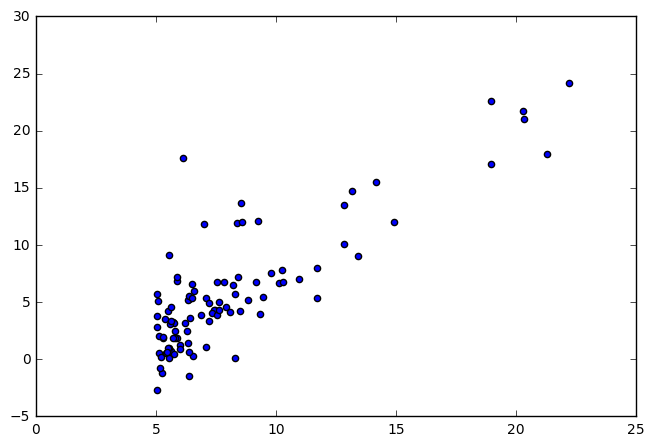

In [34]:
X=data[:,0]
y=data[:,1]
m=y.shape
plt.axes([0,0,1,1])
plt.scatter(X,y)

现在我有个要求，需要用一条线来代表这些点，貌似应该用一条直线比较合适，这时候是不是脑海中浮现了一个简单的公式：  
$y = ax + b$  
我们先统一一下符号，和Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)上的符号相等。我们把  
$y = ax + b$替换为$h_{\theta}(x) = \theta _{0}x_{0}+\theta _{1}x_{1}$  
这里，$\theta _{0}$代表之前的$b$，$x_{0}$始终为1，$\theta _{1}$代表之前的a，$x_{1}$代表之前的$x$，$h_{\theta}(x)$就是预测函数值，也就是直线的输出。  
让我们来看看$\theta _{0}$、$\theta _{1}$不同数值的情况下曲线的样子

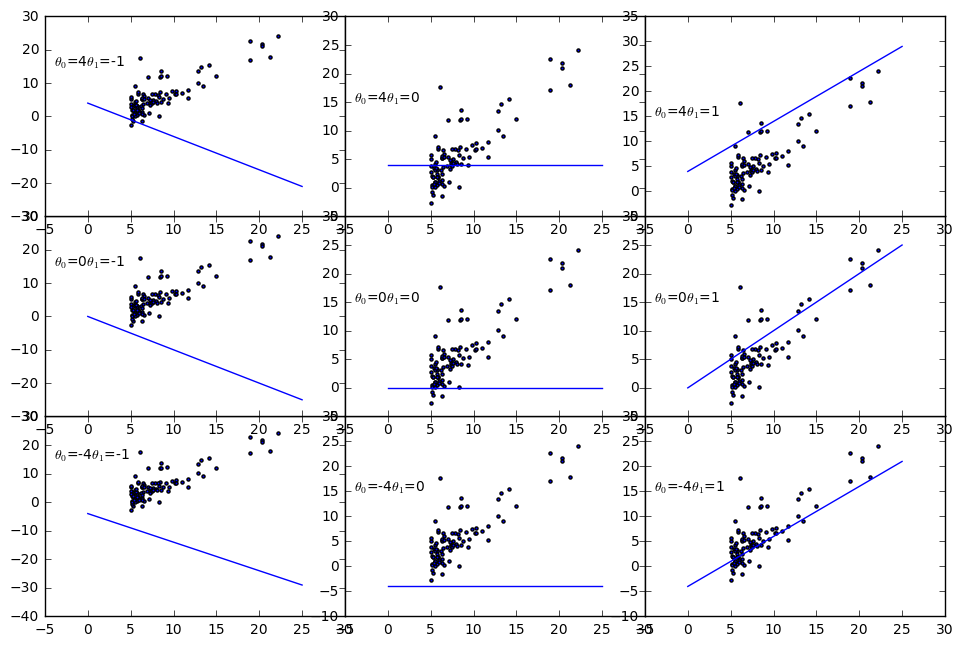

In [92]:
from itertools import *
x=np.linspace(0,25,10)
y1=np.zeros(10)
for i,(a,b) in enumerate(product([-1,0,1],[-4,0,4])):
    #print(i,a,b)
    plt.axes([(a+1)/2,(b+4)/8,0.5,0.5])
    plt.scatter(X,y,marker='.')
    y1=a*x+b
    plt.plot(x,y1)
    plt.text(-4,15,r'$\theta _{0}$'+'={}'.format(b)+r'$\theta _{1}$'+'={}'.format(a))

貌似，好像，也许……选择$\theta _{0}=0$，$\theta _{1}=1$,应该还不错，但是这个是最优的值吗？还有，这个最优应该如何定义呢？是否有衡量的标准呢？  
## 代价函数（Cost Function）
代价函数就是预测的值和实际值的误差，公式是：  
$J(\theta _{0},\theta _{1})=\frac{1}{2m}\sum_{i=0}^{m-1}\left ( h_{\theta}(x^{(i)})-y^{(i)} \right )^{2}$  
做一下翻译：  
m代表m个数据，也就是我们之前数据中data的长度，$x^{(i)}$代表第i个x值，$y^{(i)}$代表第i个y值，$h_{\theta}(x^{(i)})$在选定某组参数$\theta$后，输入$x^{(i)}$，预测输出的值，$x^{(i)}$和$y^{(i)}$构成了上图中的散点，$x^{(i)}$和$h_{\theta}(x^{(i)})$构成了上图中的直线。